In [2]:
### Import the libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
### display all the rows and columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [5]:
### Load the dataset
df=pd.read_csv("auto-mpg.csv")

In [6]:
### Shape
df.shape

(398, 9)

In [7]:
### datatypes
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [8]:
### Missing values??
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

There are no direct missing values

In [9]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
df["hp"].value_counts()

hp
150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: count, dtype: int64

There are 6 ? in this dataset.
We need to replace ? with median

In [11]:
df["hp"]=df["hp"].replace("?",np.nan)
df["hp"]=df["hp"].astype(float)

In [12]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [13]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
df["hp"]=df["hp"].replace(np.nan,df["hp"].median())

In [15]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
### Change origin into catgoric->
df["origin"]=df["origin"].replace({1:"america",2:"europe",3:"asia"})

In [17]:
df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
397,31.0,4,119.0,82.0,2720,19.4,82,america,chevy s-10
395,32.0,4,135.0,84.0,2295,11.6,82,america,dodge rampage
186,27.0,4,101.0,83.0,2202,15.3,76,europe,renault 12tl
167,29.0,4,97.0,75.0,2171,16.0,75,asia,toyota corolla
363,22.4,6,231.0,110.0,3415,15.8,81,america,buick century
160,17.0,6,231.0,110.0,3907,21.0,75,america,buick century
391,36.0,4,135.0,84.0,2370,13.0,82,america,dodge charger 2.2
15,22.0,6,198.0,95.0,2833,15.5,70,america,plymouth duster
149,24.0,4,120.0,97.0,2489,15.0,74,asia,honda civic
96,13.0,8,360.0,175.0,3821,11.0,73,america,amc ambassador brougham


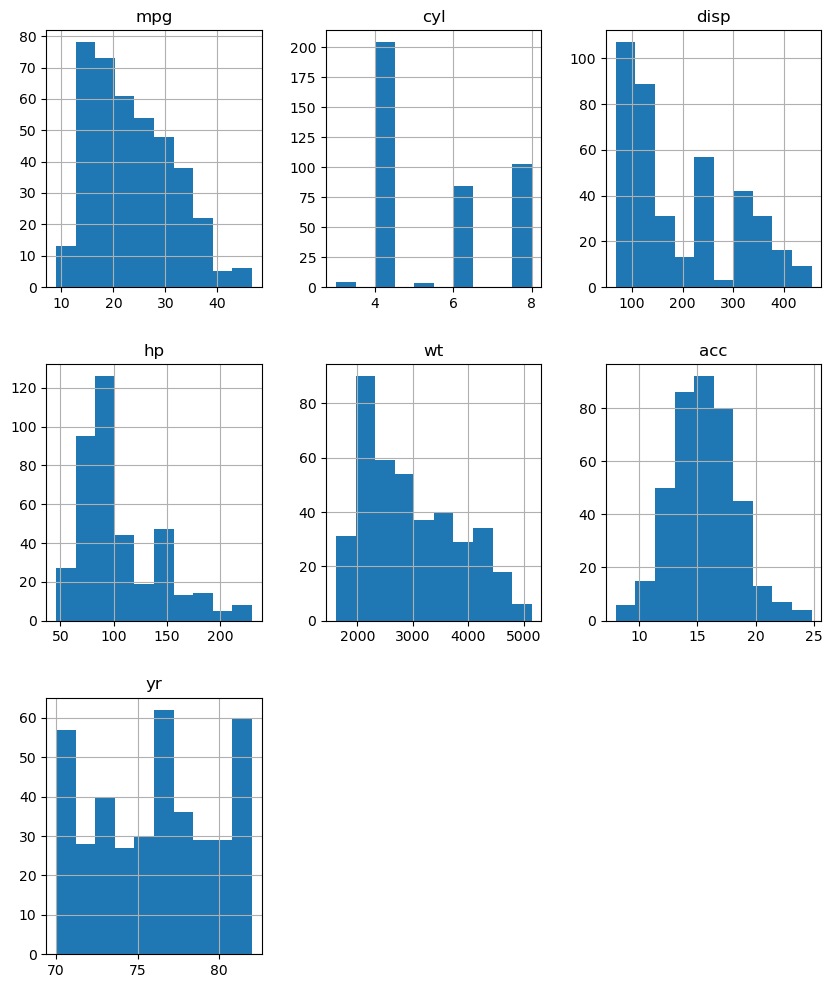

In [18]:
df.hist(figsize=(10,12))
plt.show()

In [36]:
df.skew(numeric_only=True)

mpg     0.457066
cyl     0.526922
disp    0.719645
hp      1.106224
wt      0.531063
acc     0.278777
yr      0.011535
dtype: float64

<Axes: xlabel='mpg'>

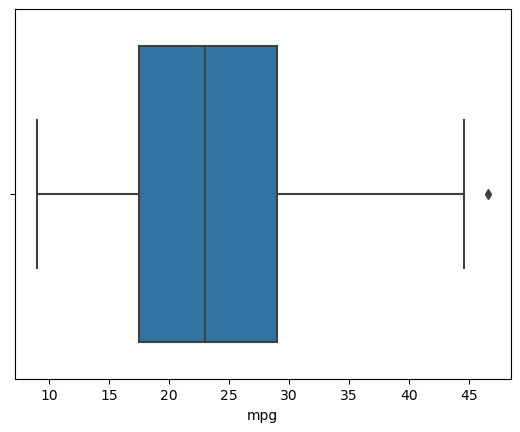

In [37]:
sns.boxplot(x="mpg",data=df)

<Axes: xlabel='cyl'>

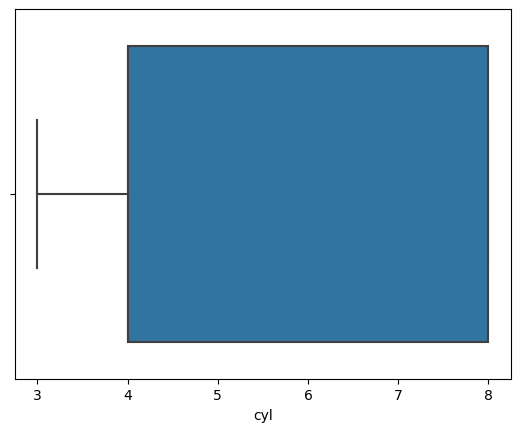

In [38]:
sns.boxplot(x="cyl",data=df)

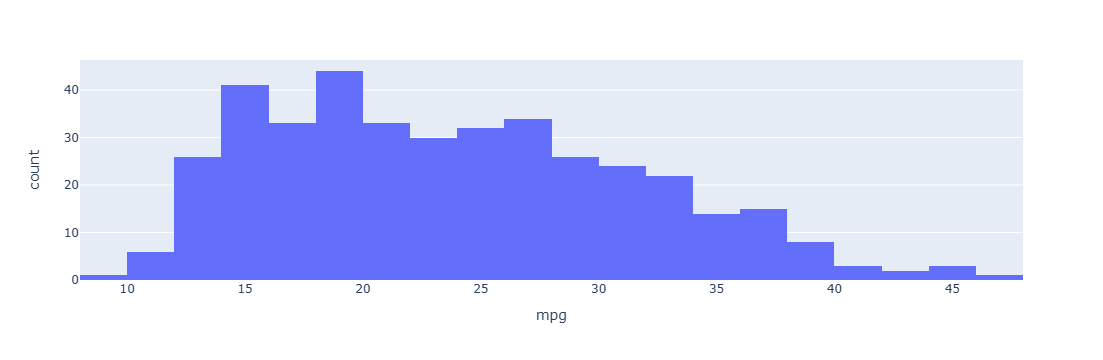

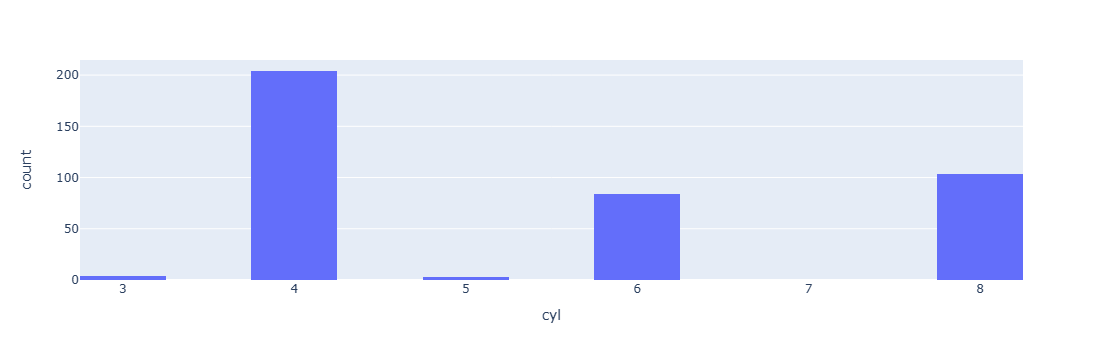

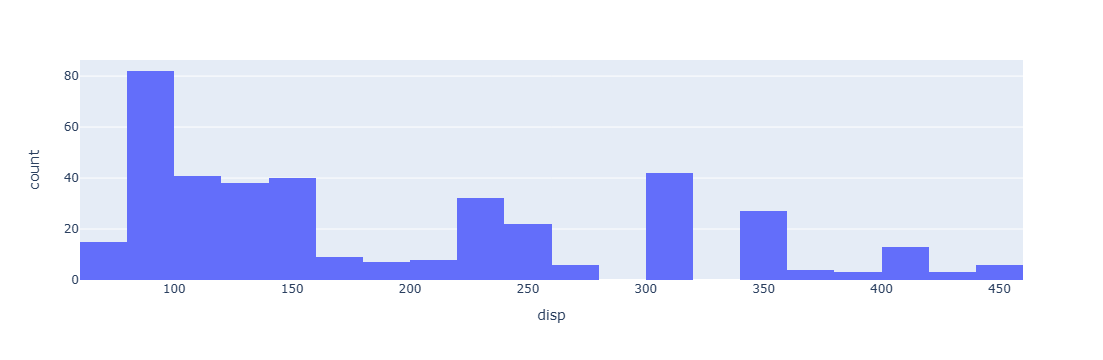

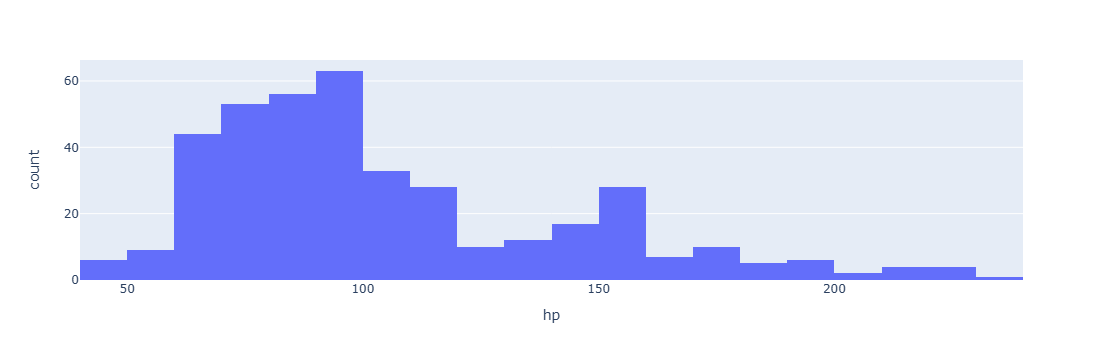

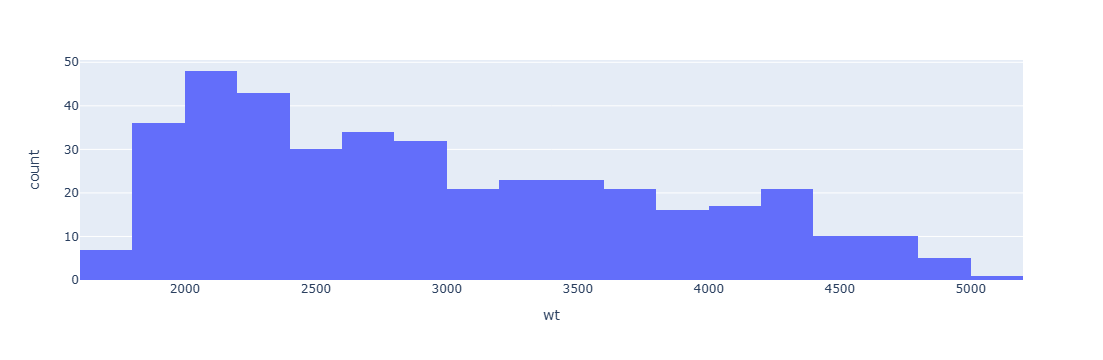

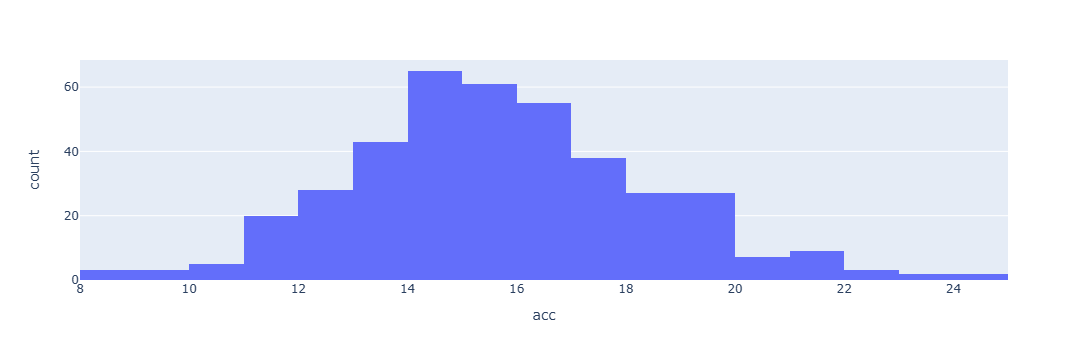

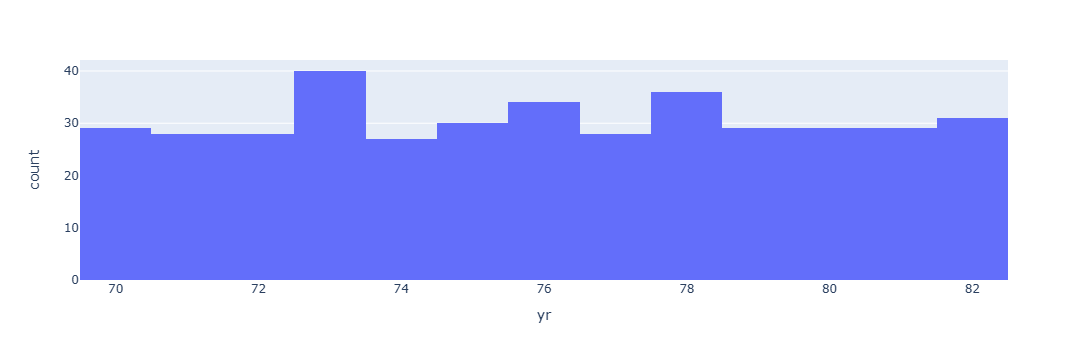

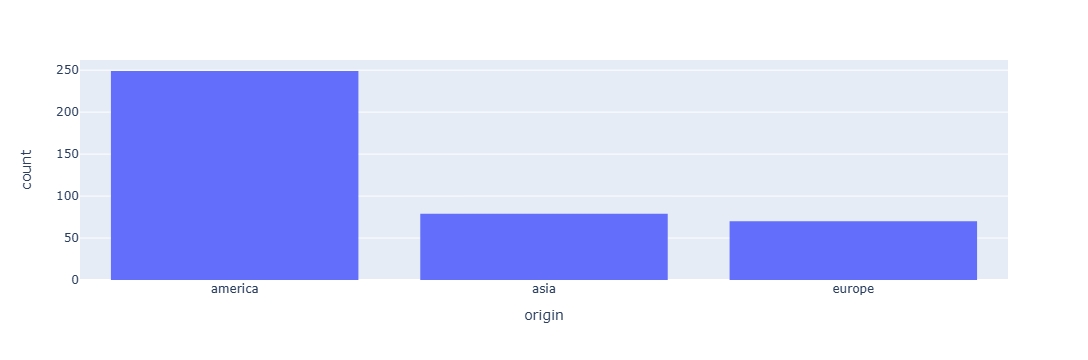

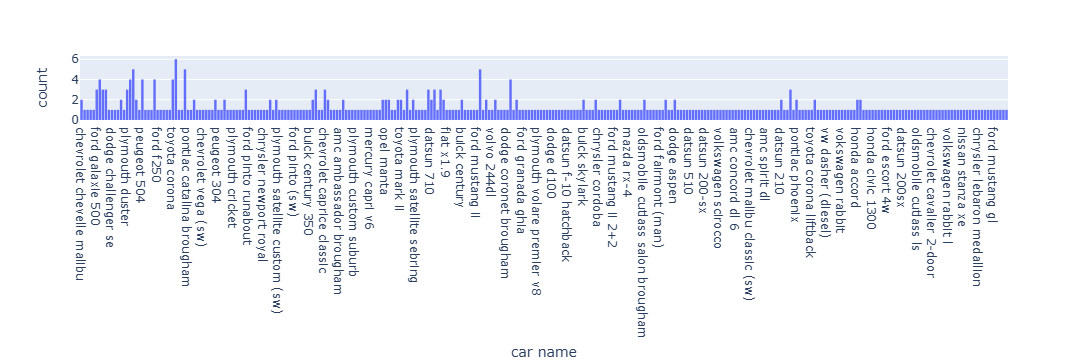

In [39]:
import plotly.express as px
for column in df:
    fig=px.histogram(df,x=column,nbins=20)
    fig.show()

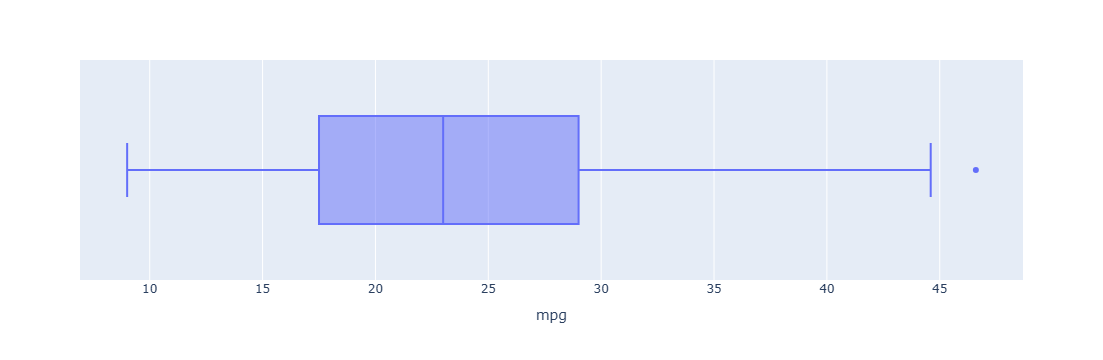

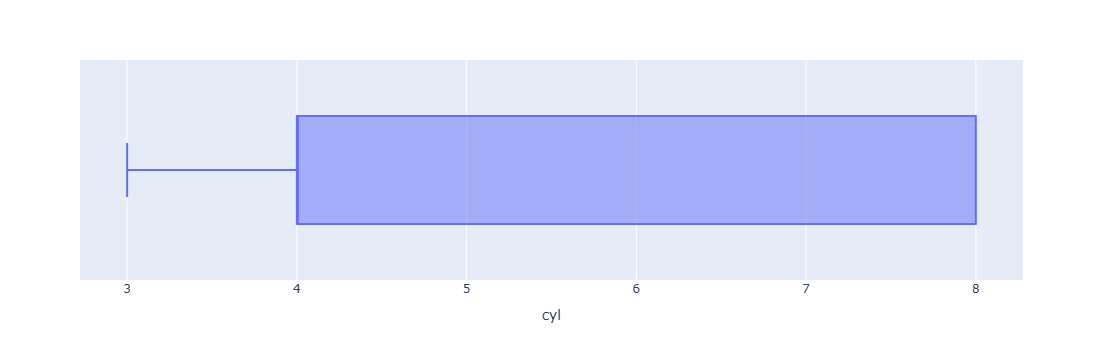

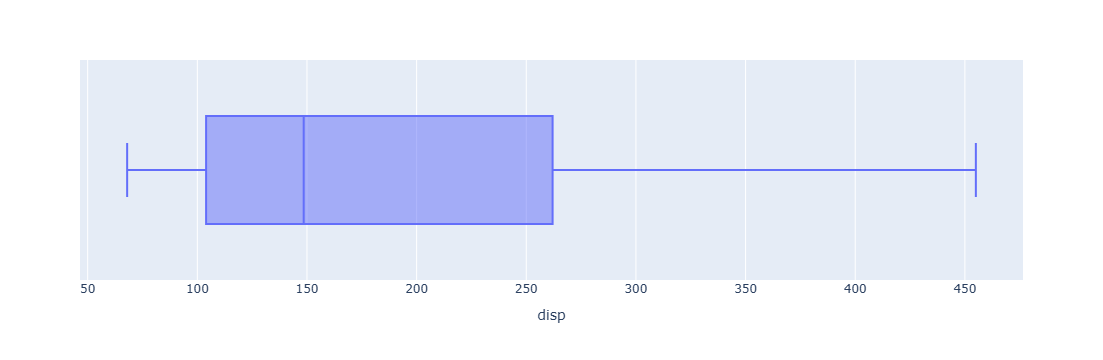

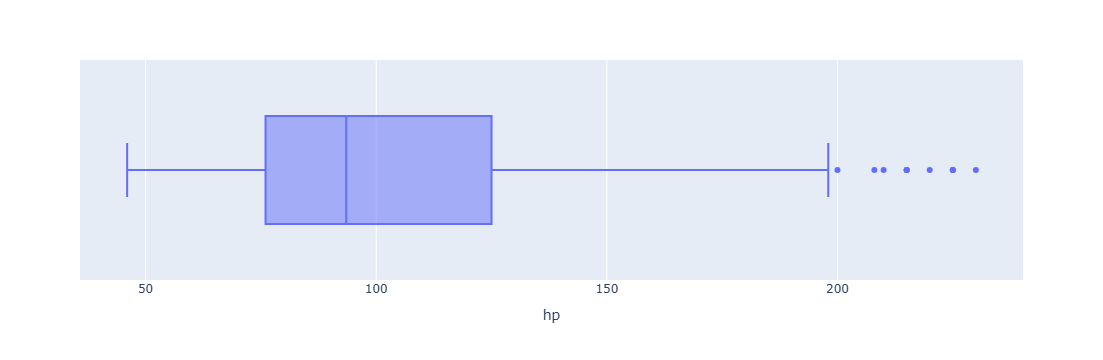

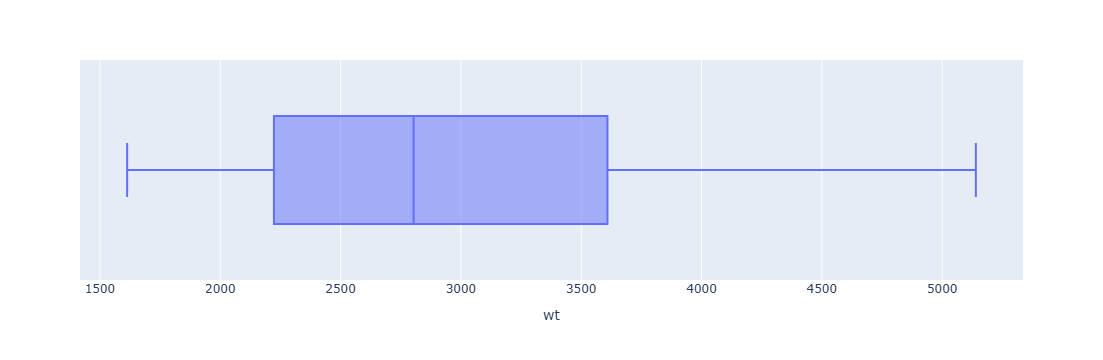

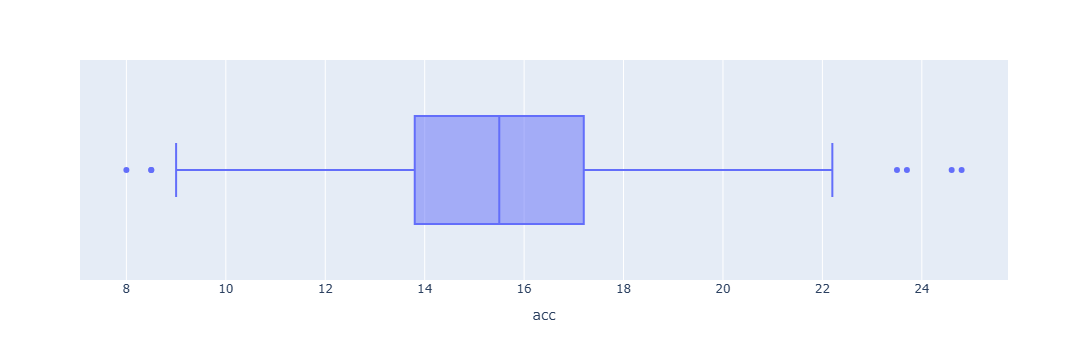

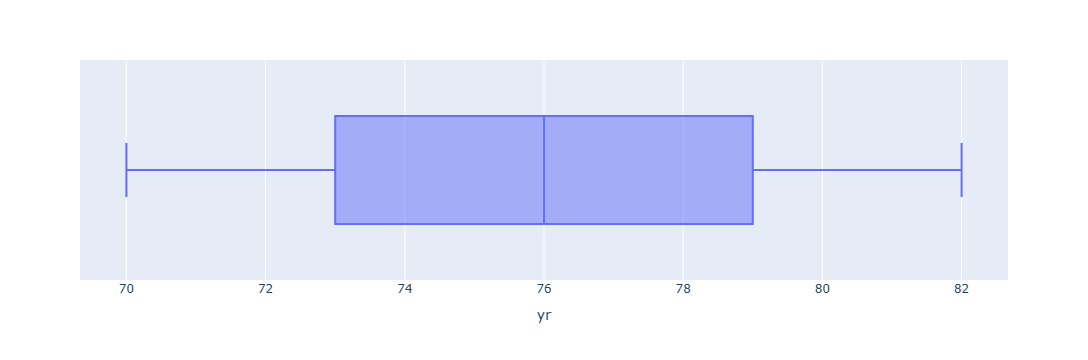

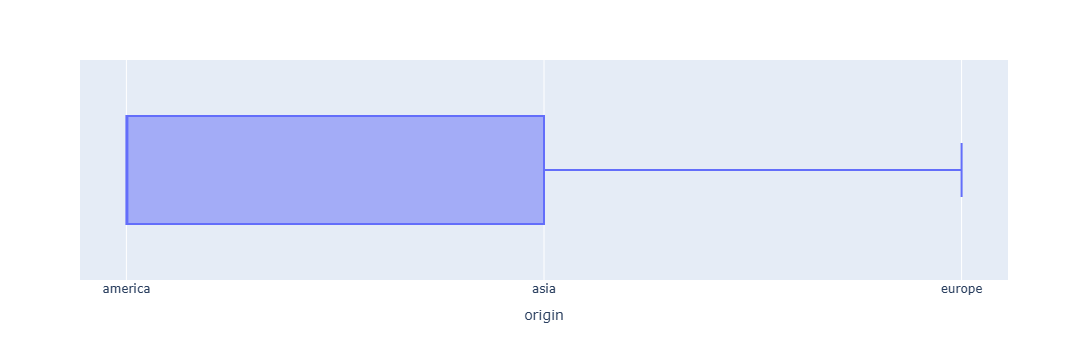

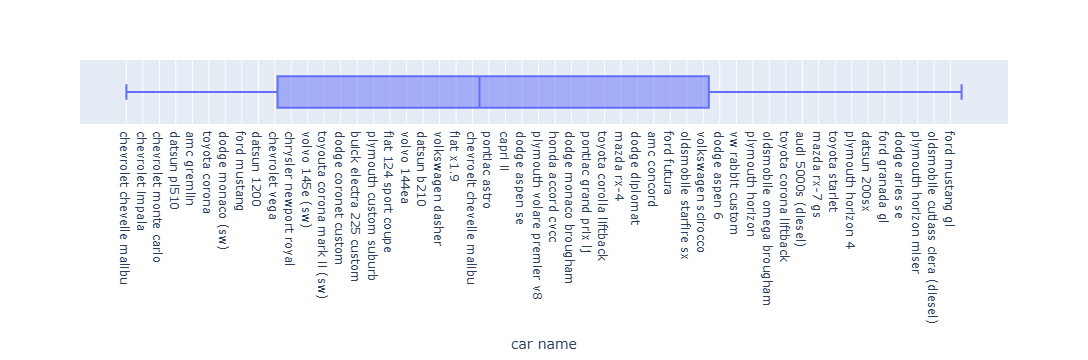

In [40]:
for column in df:
    fig=px.box(df,x=column)
    fig.show()

In [ ]:
sns.pairplot(df)

In [ ]:
plt.scatter(df["hp"],df["mpg"])

In [ ]:
sns.countplot(x="origin",data=df)

In [ ]:
sns.violinplot(x="origin",y="mpg",data=df)

In [ ]:
sns.barplot(x="cyl",y="mpg",data=df)

In [ ]:
sns.lineplot(x="yr",y="mpg",data=df)

In [ ]:
sns.jointplot(x="wt",y="mpg",data=df)

In [ ]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

<Axes: xlabel='wt', ylabel='mpg'>

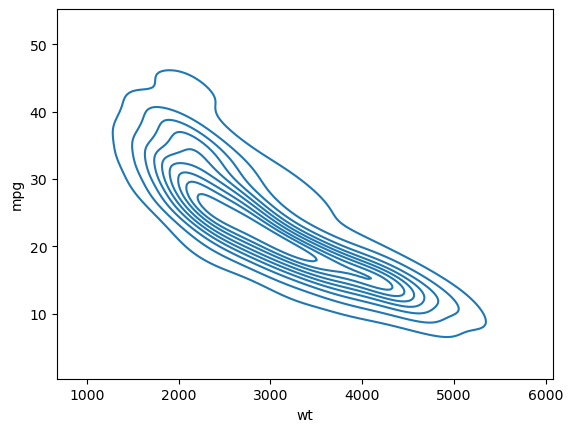

In [33]:
sns.kdeplot(x="wt", y="mpg", data=df)

In [35]:
sns.boxenplot(x="origin", y="mpg", data=df

SyntaxError: incomplete input (1673441208.py, line 1)

In [ ]:
g = sns.FacetGrid(col='origin', row='yr',data=df)
g.map(sns.scatterplot, 'cyl', 'acc')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('FacetGrid Plot')
plt.show()

In [ ]:
sns.pairplot(data=df, hue="mpg", diag_kind="kde", palette="husl")